### Dominant colour Extraction Assignment

##### importing Dependencies

In [106]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
from sklearn.cluster import KMeans

##### Read or upload image from the directory

In [107]:
actual_image = img.imread("gaza.jpg")


##### Check the Shape or Resolution of image

In [108]:
print('Actual Image shape/resolution/dimension', actual_image.shape)

Actual Image shape/resolution/dimension (1280, 1920, 3)


### Re-sizing the image

In [131]:
row, col = actual_image.shape[:2]
limit = 700
update_image = cv2.resize(actual_image, (int(limit*float(col)/row), limit))


### checking the pixel size

In [130]:
img_pixels = update_image.reshape((-1, 3))

print('Actual image pixels shape after re-shaping:', img_pixels.shape)
print('update image pixel shape after re-sizing :', update_image.shape)

Actual image pixels shape after re-shaping: (735000, 3)
update image pixel shape after re-sizing : (700, 1050, 3)


In [111]:
%matplotlib inline

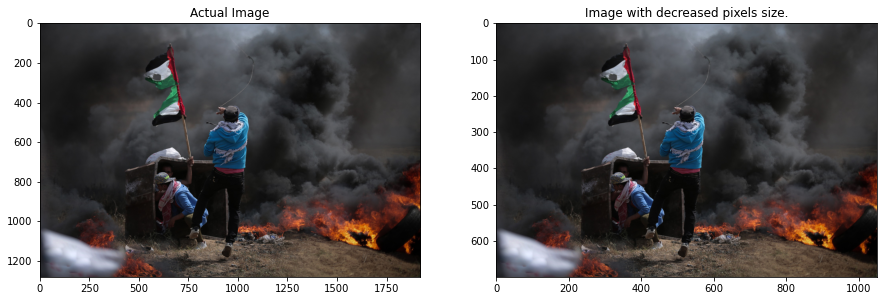

In [133]:
plt.figure(figsize=(15,11))
plt.axis("off")

plt.subplot(121)
plt.title('Actual Image')
plt.imshow(actual_image)

plt.subplot(122)
plt.title('Image with decreased pixels size.')
plt.imshow(update_image)
plt.show()

### convert the updated image into array

In [134]:
red,green,blue =[],[],[]
for row in update_image:
    for red_val, green_val, blue_val in row:
        red.append(red_val)
        green.append(green_val)
        blue.append(blue_val)
print(row)

[[29 30 34]
 [29 30 34]
 [28 29 33]
 ...
 [35 36 23]
 [40 41 27]
 [46 49 32]]


### Normalizing the group of observations on a per feature basis

##### imort 'whiten' so that feature is divided by its standard deviation across all observations to give it unit variance

In [114]:
from scipy.cluster.vq import whiten

In [115]:
scaled_red = whiten(red)
scaled_blue = whiten(blue)
scaled_green = whiten(green)

In [116]:
df = pd.DataFrame({'red':red,'blue':blue,'green':green,'scaled_red':scaled_red,'scaled_blue':scaled_blue,
                   'scaled_green':scaled_green})
df

,red,blue,green,scaled_red,scaled_blue,scaled_green
0,30,30,30,0.796174,0.790533,0.859740
1,30,30,30,0.796174,0.790533,0.859740
2,30,30,30,0.796174,0.790533,0.859740
3,31,31,31,0.822713,0.816884,0.888398
4,30,30,30,0.796174,0.790533,0.859740
...,...,...,...,...,...,...
734995,31,22,33,0.822713,0.579724,0.945714
734996,33,24,35,0.875792,0.632426,1.003030
734997,35,23,36,0.928870,0.606075,1.031688
734998,40,27,41,1.061566,0.711480,1.174978


#### Setting classification by KMeans and set number of 'k' or cluster becouse colors are in groups so this is the best choice for this problem

In [117]:
k_means= KMeans(n_clusters=12)
k_means.fit(img_pixels)
print(k_means.cluster_centers_)

[[111.91508277 114.54820662 120.3780656 ]
 [ 28.55696886  25.91927987  25.64444215]
 [ 75.06202507  72.94173493  73.51545446]
 [141.02510065 149.47288626 164.92551585]
 [ 44.24132449  41.63012764  42.10102602]
 [ 92.66217222  89.50966332  88.99595338]
 [193.74684601 200.88237477 218.47003711]
 [106.32522386  44.92055444  34.92505213]
 [ 12.61999468  10.89984929   9.81116463]
 [ 59.24833929  57.30770387  57.27628573]
 [ 16.77300151  62.232493    97.50732601]
 [186.99473481  98.31154488  42.2808527 ]]


#### convert cluster into a common array for the colours

In [118]:
clr_array = np.asarray(k_means.cluster_centers_, dtype='uint8')
print(clr_array)

[[111 114 120]
 [ 28  25  25]
 [ 75  72  73]
 [141 149 164]
 [ 44  41  42]
 [ 92  89  88]
 [193 200 218]
 [106  44  34]
 [ 12  10   9]
 [ 59  57  57]
 [ 16  62  97]
 [186  98  42]]


#### Again show the orignal image for just visualization against its extracted dominent colours

_________Original Image_________


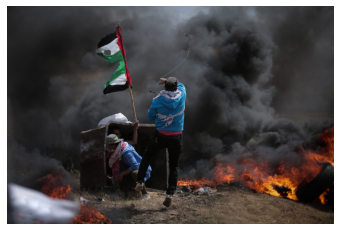

In [119]:
print("_________Original Image_________")
plt.axis('off')
plt.imshow(actual_image)
plt.show()

#### Showing the dominent colour bar

Dominant 12 _________Colours of Image___________ 


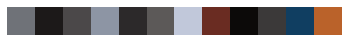

In [120]:
print("Dominant",12,"_________Colours of Image___________ ")
plt.axis('off')
plt.imshow([clr_array])
plt.show()

#### Get the amount of dominance with respect to percentage of each dominant colour

In [121]:
pixels_amount = np.unique(k_means.labels_, return_counts=True)[1]
percentage = pixels_amount/img_pixels.shape[0]
percentage

array([0.03593741, 0.17124898, 0.13722993, 0.02166395, 0.20538776,
       0.08440816, 0.01466803, 0.03325442, 0.09207891, 0.18090204,
       0.01263129, 0.01058912])

 #### Constructing a bar chart for the amount of each dominat colour so that the most and minor will be visualize

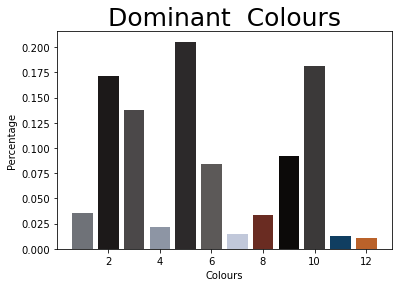

In [137]:
plt.title('Dominant  Colours', size=25)
plt.bar(range(1,13), percentage, color=np.array(clr_array)/255)
plt.ylabel('Percentage')
plt.xlabel('Colours')
plt.show()

***_____________________________ Completed _____________________________***

**Cover Letter !**

Assalamu Alikum Anwar Sir !

My name is Abdul Manan and I'm from Dera Ismail Khan,KPK.I am fresh Graduate as I completed BSCS in 10th October 2022, with 3.7 CGPA from GDC No. 1 that belong to Gomal Univaersity Dera ISmail Khan.The Purpose of writing as a cover letter to you is that currently I am in lahore in a private room for the sack of intern or job in Machine Learning field, my Dream Field but by Allah's will still don't get any opportunity.I have skill but at beginning level and this is the very first sort of program I ever done in OpenCv but done number of projects at reggresssion approach as I mention in my resume.I assure you that I love this filed the actually you are doing because my puposre is attach with it,if you give me chance as a learner ,beginner even at unpaid duaration you will found me a smart and hardworking learner.

Again Thanks for that I gain lot of ideas through this assigments and your explaination in the notes.